<a href="https://colab.research.google.com/github/Srijen-G/Neo_Project/blob/master/EDA_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS OF CAR DATASET
---
*What is Exploratory data analysis(EDA)?*

> Exploratory analysis is often the first step of data analysis. Here we get familiar with data, ask questions, visualize the data in a number of forms, look for relationships between the variables, look for outliers, patterns and trends in data.
 
 ---

*What is the purpose of EDA?*

> The purpose of exploratory data analysis is to: Check for missing data and other mistakes. Gain maximum insight into the data set and its underlying structure. Uncover a parsimonious model, one which explains the data with a minimum number of predictor variables.

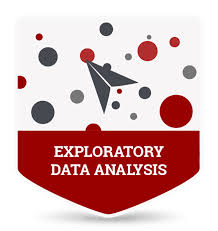

We shall now begin with our analysis and later build models to predict the prices of CARS in the datset.

# Importing necessary libraries 

In [ ]:
#Importing the required libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt  #visualisation
%matplotlib inline
import seaborn as sns                 #visualisation

## Importing the dataset to be worked upon and creating a dataframe named 'df' to store the data.

In [ ]:
#Loading the CSV file into pandas DataFrame

url = 'https://raw.githubusercontent.com/Srijen-G/Neo_Project/master/data.csv'

df = pd.read_csv(url)

### Getting the basic idea of dataset by viewing first 5 rows using df.head()

In [ ]:
#To display top 5 rows
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#To display bottom 5 rows 
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


## After looking at the data we got a basic idea about it 
-_-_
*Next we shall look about general properties associated with this data*


In [ ]:
#To look at shape of the data

shape = df.shape
print("Number of Rows: ", shape[0])
print("Number of Columns: ", shape[1])

Number of Rows:  11914
Number of Columns:  16


In [ ]:
#To get a general idea about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5


*  From df.shape we got the number of rows & columns of the DataFrame.
*  From df.info() we got the count of non-null values in each column along with the type of data stored in each columns.
---
> *In some columns like Engine HP,Engine Cylinders, Market Categories we can observe that the **count of non-null values is less the number of rows** in the DataFrame; thus we can conclude that there are some missing values in those columns*






In [ ]:
#To know the dtypes of data in each columns

df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

We shall look at some basic statistical properties of the given data and try to identify which columns could be dropped.

In [ ]:
#Getting basic statistical properties of the data

df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


> From the above statistical data we can conclude that the column named ***Number of Doors*** has standard deviation near about *0*. This implies that the values in that column are more or less same and thus wont be affecting the Price much.
---
> We shall now find the number of missing data in each column.
*   The below code first identifies the rows with null values and returns a true if it encounters a *NaN* value; then it adds the True (considering it as 1) values columnwise to display the following result.



In [ ]:
#To find the number of missing data in each column

df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

From above we can observe that column ***Market Category*** has *too many missing values*, so its better to remove the column.

---
We shall remove 2 columns.Those are:- 
1.   Number of Doors
* Reason- standard deviation almost 0,thus values are almost same.
2.   Market Category
* Reason- too many missing values.

In [ ]:
#To drop Columns 

df.drop(columns= ['Number of Doors','Market Category'],axis=1,inplace=True)

In [ ]:
#Checking our Progress till now
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


## Renaming the columns to make DataFrame look better.

  Sometimes few column names can make the dara look messy and it's better if we rename them to make our data look better and presentable.

In [ ]:
df.rename(columns={ "Engine HP": "HP", "Engine Cylinders": "Cylinders", 
                   "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode",
                   "highway MPG": "MPG-H","city mpg": "MPG-C", "MSRP": "Price" },inplace=True)

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


## Dropping Duplicates

---
Sometimes few entries are repeated which can lead to wrong conclusions, thus its better to remove such entries before using data in the model.


In [ ]:
print("Number of rows with duplicate entries: ", df[df.duplicated()].shape[0])

Number of rows with duplicate entries:  721


In [ ]:
## Removing the Duplicate Entries from DataFrame

df.drop_duplicates(inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
#Checking number of duplicate entries after processing

df[df.duplicated()]

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price


## Checking for null values in the data

In [ ]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64



> *We can observe that a small fraction of the data has null/missing values in it thus it won't cause much difference if we remove them.*




In [ ]:
#Dropping the missing values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum() #Checking our data once again

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

In [ ]:
df.shape

(11092, 14)

## Checking for Outliners and then handling them

In [ ]:
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500




> *We shall now plot some graphs/plots to detect if there's outliner present in our data which needs to be handled.*



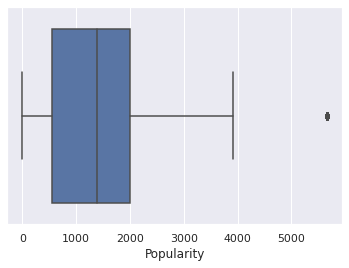

In [ ]:
sns.boxplot(x="Popularity",data=df)

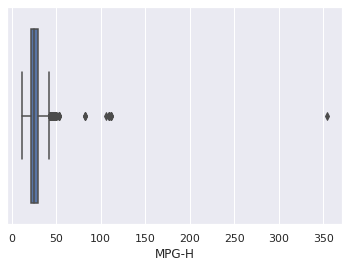

In [ ]:
sns.boxplot(x="MPG-H",data=df)

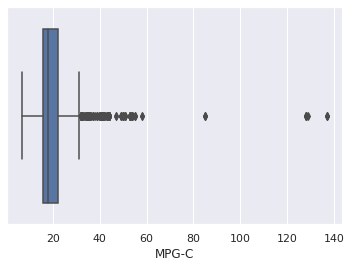

In [ ]:
sns.boxplot(x="MPG-C",data=df)

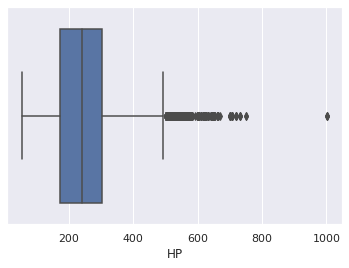

In [ ]:
sns.boxplot(x="HP",data=df)

> Since we inferred from boxplots that there are outliners present in the data.

> But it would be better if we plot various scatterplots to better look at them



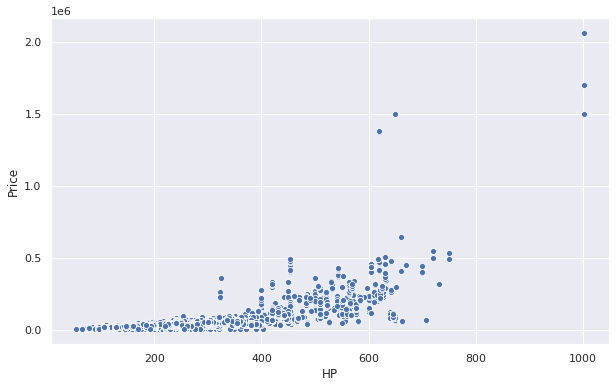

In [ ]:
#Scatterplot using seaborn library
plt.figure(figsize=(10,6))
sns.set()
sns.scatterplot(x="HP",y="Price",data=df)

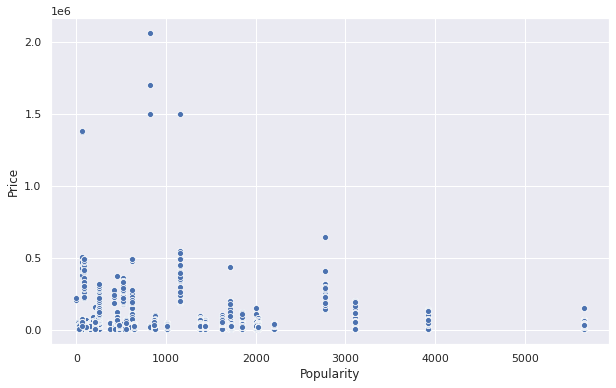

In [ ]:
plt.figure(figsize=(10,6))
sns.set()
sns.scatterplot(x="Popularity",y="Price",data=df)

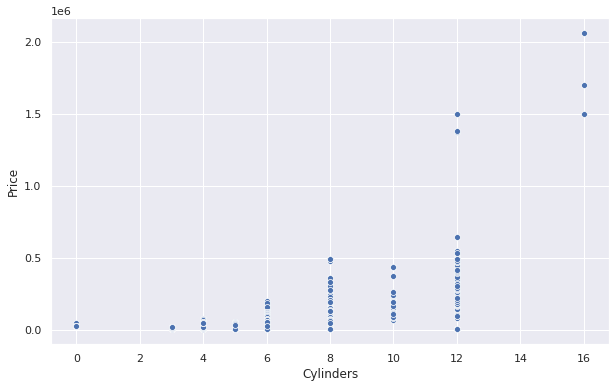

In [ ]:
plt.figure(figsize=(10,6))
sns.set()
sns.scatterplot(x="Cylinders",y="Price",data=df)

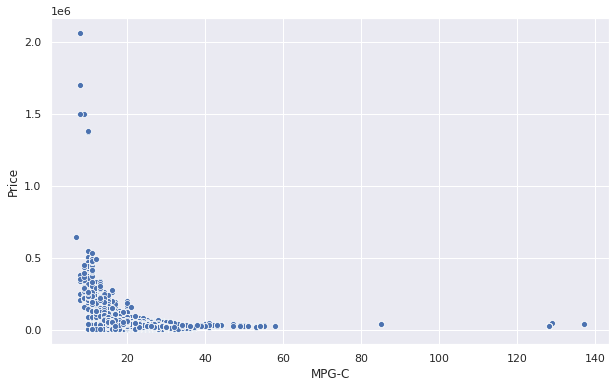

In [ ]:
plt.figure(figsize=(10,6))
sns.set()
sns.scatterplot(x="MPG-C",y="Price",data=df)

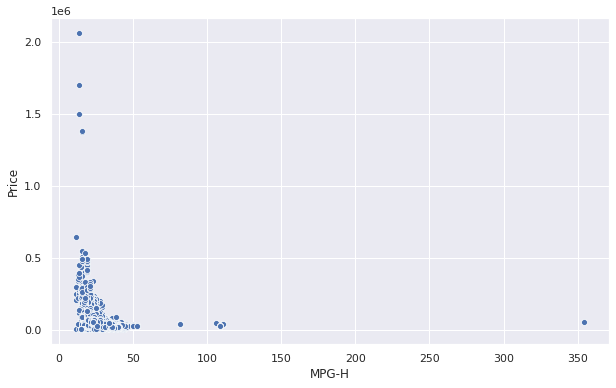

In [ ]:
plt.figure(figsize=(10,6))
sns.set()
sns.scatterplot(x="MPG-H",y="Price",data=df)



> From the above scatter plots and box plots we get a clear sense about the outliners and how each column posses some outliners.

---


## We shall now handle these outliners using Inter-quantile range (IQR).

> *The **interquartile range (IQR)**, also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, **IQR = Q3 − Q1**.* 

>*In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.*

>*It is a measure of the dispersion similar to standard deviation or variance, but is **much more robust against outliers**.* 








In [ ]:
#IQR method to handle outliners

Q1 = df.quantile(0.25)      #Quantile 1
Q3 = df.quantile(0.75)      #Quantile 2
IQR = Q3 - Q1               #IQR
print(IQR)


Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21491.25
dtype: float64


Removing outliners.
The following code first check for data points which are outliner on either side of IQR range. 
Then the 

In [ ]:
df2 = df[~( (df < (Q1 - 1.5 * IQR) ) | (df > (Q3 + 1.5 * IQR) ) ).any(axis=1)]

In [ ]:
df2.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
#Checking the shape of the dataset after removing the outliners.
df2.shape

(8608, 14)

## What are the most represented CAR brands in the dataset?

In [ ]:

print("Top 10 Car brands most represented in the dataset are :\n")
df2.Make.value_counts()[:10]

Top 10 Car brands most represented in the dataset are :



Chevrolet     1028
Toyota         629
Volkswagen     515
Nissan         513
GMC            469
Dodge          425
Mazda          378
Honda          373
Suzuki         336
Infiniti       322
Name: Make, dtype: int64

Text(0, 0.5, 'Percentage present per car brand')

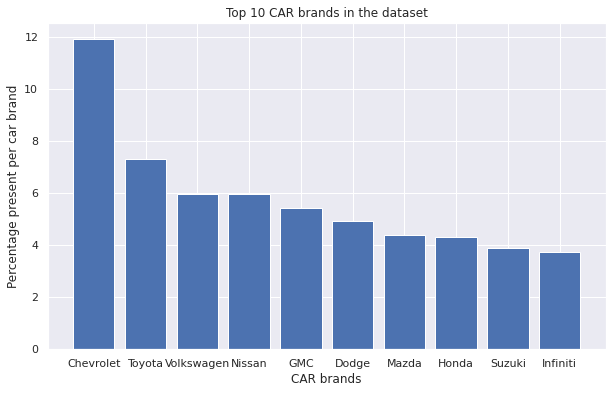

In [ ]:
#Percentage of each car brand
count = df2.Make.value_counts()*100/sum(df2.Make.value_counts())

plt.figure(figsize = (10,6))
plt.bar(count.index[:10],height=count[0:10])
plt.title("Top 10 CAR brands in the dataset")
plt.xlabel("CAR brands")
plt.ylabel("Percentage present per car brand")



> We shall now find the average price of top CAR brands



In [ ]:
 df2[['Make','Price']].loc[(df2.Make == 'Chevrolet')|
                           (df['Make'] == 'Ford')|
                (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()

,Price
Make,
Chevrolet,28188.626459
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Mazda,20495.820106
Nissan,28352.543860
Toyota,29011.750397
Volkswagen,29032.817476


## Correlation

> *Correlation is a statistical measure. Correlation explains how one or more variables are **related** to each other.*



In [ ]:
#Finding the correlation matrix 
df2.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330540,-0.094397,0.359829,0.323613,0.204453,0.591644
HP,0.330540,1.000000,0.741031,-0.465311,-0.563362,0.105691,0.743497
Cylinders,-0.094397,0.741031,1.000000,-0.697884,-0.750850,0.025803,0.392174
MPG-H,0.359829,-0.465311,-0.697884,1.000000,0.937936,0.080857,-0.127772
MPG-C,0.323613,-0.563362,-0.750850,0.937936,1.000000,0.070320,-0.202410
Popularity,0.204453,0.105691,0.025803,0.080857,0.070320,1.000000,0.116684
Price,0.591644,0.743497,0.392174,-0.127772,-0.202410,0.116684,1.000000


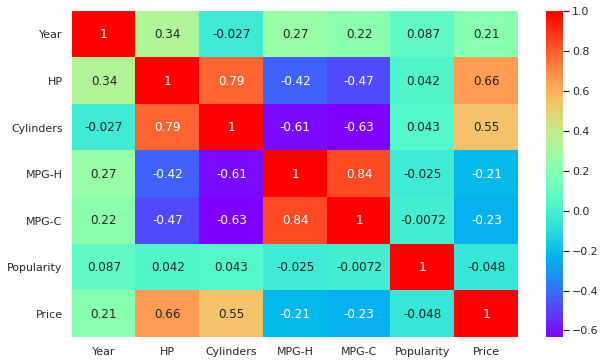

In [ ]:
#Correlation can be best represeted using a heatmap.

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='rainbow',annot=True)

Conclusions Drawn

> From the correlation matrix and heatmap we can conlude that there's a ***High positive correlation*** between:-
   

*   Cylinders & HP
*   MPG-City & MPG-Highway

*This implies that the more the number of cylinders in the car engine the greater power is generated in the car.*


---
> From the correlation matrix and heatmap we can conlude that there's a ***High Anti-correlation*** between:-


*   Cylinders & MPG-C
*   Cylinders & MPG-H

*This implies that the higher the number of cylinders in a car the lower is the MPG of City or Highway because there is a greater fuel consumption.*




In [ ]:
df2.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


## Which is maximum sold Engine Fuel Type in the dataset?

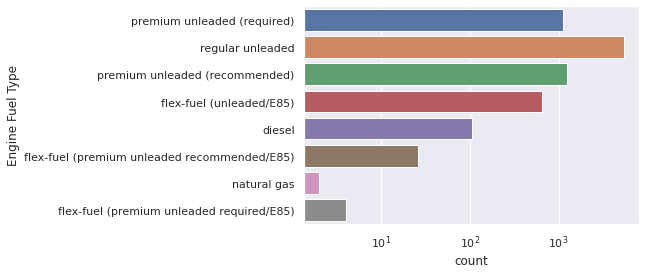

In [ ]:
# Plotting a countplot to display the count of each Engine Fuel Type
sns.countplot(y='Engine Fuel Type',data=df2)
plt.xscale('log')

> *We conclude that the **regular unleaded** Engine Fuel type is the **most sold fuel type** followed by premium unleaded(required) and premium unleaded(recommended).*

## Which style of vehicle has been sold the most according to dataset?
## Which drive mode was maximum in a particular type of vehicle syle?

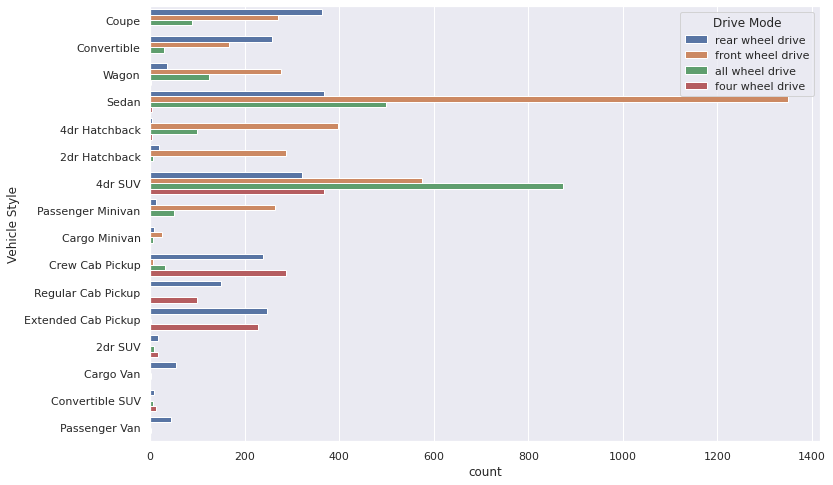

In [ ]:
plt.figure(figsize= (12,8))
sns.countplot(data=df2,y='Vehicle Style',hue='Drive Mode')

> *From the plot we infer that most sold vehicle style is **Sedan** and particulary Front Wheel Drive mode has been sold the most.*

## What were the different Transmission type of Cars and their approximate number in the dataset? Also mention about different Vehicle size in each Transmission type of vehicle.

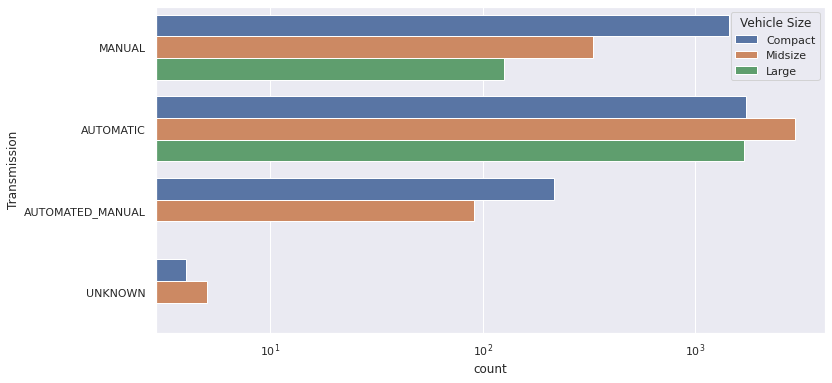

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='Transmission',data=df2,hue='Vehicle Size')
plt.xscale('log')

> *The above plot shows us that people have been developing interest into **automatic mode of transmission cars than the manual type**. However it also shows that semi-automated or Autmated_manual type of transmission is less preffered than completely manual or completely automatic.*
> *We can also conclude that **in Automatic type vehicle Mid-size vehicles** are preffered more while in Manual type of vehicles Compact vehicles are preffered more by the people.*

## What is the Price range in which most of the vehicles have been sold? 

In [ ]:
#We slice the Price column of our dataset and group it according to the ranges

df2['Price group'] = pd.cut(df2.Price,[0,20000,40000,60000,80000,100000],labels=['<20k','20-39k','40-59k','60-79k','80k>'],include_lowest=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Number of Cars in different Price Ranges.
df2['Price group'].value_counts()

20-39k    4753
40-59k    1755
<20k      1705
60-79k     395
80k>         0
Name: Price group, dtype: int64

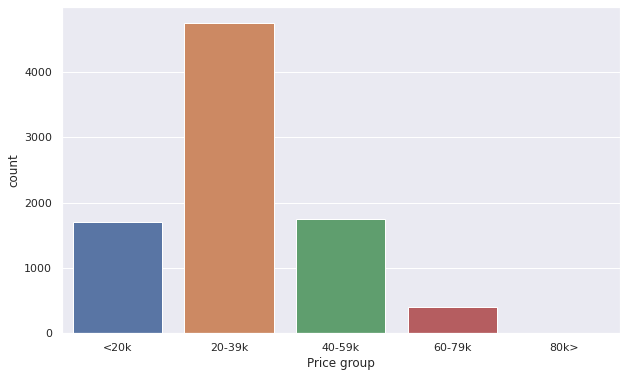

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df2,x='Price group')

> *We infer that Cars whose price fall in the range of 20-39k are preffered by the people. Thus, if a company should try to sell it's new car in the same price range for better sales.*

## Splitting and Building Machine Learning model

In [ ]:
#Checking the dataset once again
df2.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price,Price group
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135,40-59k
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650,40-59k
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350,20-39k
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450,20-39k
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500,20-39k


In [ ]:
#Checking out some basic stats of the dataset
df2.describe()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
count,8608.000000,8608.000000,8608.000000,8608.000000,8608.000000,8608.000000,8608.000000
mean,2011.301464,235.668564,5.392542,26.673792,19.427625,1210.296352,30995.925651
std,6.302663,77.713720,1.388788,5.680609,4.350680,864.186610,15158.214995
min,1994.000000,66.000000,3.000000,13.000000,10.000000,21.000000,2000.000000
25%,2008.000000,172.000000,4.000000,23.000000,16.000000,549.000000,21942.500000
50%,2015.000000,230.000000,6.000000,26.000000,19.000000,1013.000000,29970.000000
75%,2016.000000,290.000000,6.000000,31.000000,22.000000,1851.000000,39995.000000
max,2017.000000,485.000000,8.000000,42.000000,31.000000,3916.000000,75200.000000


We now create a new dataset which has few columns dropped from the original dataset.

>*We drop the columns like HP because they have **high correlation** with other columns like Cylinders,thus retaining anyone of the column would be enough for the approximate contribution. Similarly, we can drop MPG-H as it highly correlated with MPG-C.* 

> *We can also drop few columns like price group, popularity, model since they don't create a great impact in determing the price of CAR.*

In [ ]:
#Creating a new dataset with few dropped columns
t1 = df2.drop(['HP','MPG-H','Model','Price group','Popularity'],axis=1)
t1.head()

,Make,Year,Engine Fuel Type,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-C,Price
0,BMW,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,Compact,Coupe,19,46135
1,BMW,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,Compact,Convertible,19,40650
2,BMW,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,Compact,Coupe,20,36350
3,BMW,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,Compact,Coupe,18,29450
4,BMW,2011,premium unleaded (required),6.0,MANUAL,rear wheel drive,Compact,Convertible,18,34500


> *Converting dtypes of few categorical columns to string so that they can be encoded like strings and then used in the model.*

In [ ]:
#Creating a dictionary to convert the particular columns to strings
convert_dict = {'Year' : str,           
                'MPG-C' : str,
               'Cylinders': str}

In [ ]:
#Converting the dtypes of columns and verifying it.
t1 = t1.astype(convert_dict)
t1.dtypes

Make                object
Year                object
Engine Fuel Type    object
Cylinders           object
Transmission        object
Drive Mode          object
Vehicle Size        object
Vehicle Style       object
MPG-C               object
Price                int64
dtype: object

> *Creating dummy variables for categorical columns.*

> *These would be used as an input to Machine Learning Models.*

In [ ]:
# Get dummies
X = pd.get_dummies(t1, prefix_sep='_', drop_first=True)
# X head
X.head()

,Price,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Mazda,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Saab,Make_Scion,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Year_1995,Year_1996,Year_1997,...,Drive Mode_front wheel drive,Drive Mode_rear wheel drive,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_2dr SUV,Vehicle Style_4dr Hatchback,Vehicle Style_4dr SUV,Vehicle Style_Cargo Minivan,Vehicle Style_Cargo Van,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon,MPG-C_11,MPG-C_12,MPG-C_13,MPG-C_14,MPG-C_15,MPG-C_16,MPG-C_17,MPG-C_18,MPG-C_19,MPG-C_20,MPG-C_21,MPG-C_22,MPG-C_23,MPG-C_24,MPG-C_25,MPG-C_26,MPG-C_27,MPG-C_28,MPG-C_29,MPG-C_30,MPG-C_31
0,46135,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,40650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,36350,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,29450,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,34500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


> *Purpose of splitting data into two different categories is to avoid overfitting which is paying attention to minor details/noise which are not necessary and only optimizes the training dataset accuracy.*

In [ ]:
#Splitting the dataset into 80% training and 20% testing dataset.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.drop('Price',axis=1),X.Price,test_size=0.2,random_state=40)

In [ ]:
#Checking our training data
X_train

,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_FIAT,Make_GMC,Make_Genesis,Make_HUMMER,Make_Honda,Make_Hyundai,Make_Infiniti,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Lotus,Make_Maserati,Make_Mazda,Make_Mercedes-Benz,Make_Mitsubishi,Make_Nissan,Make_Oldsmobile,Make_Plymouth,Make_Pontiac,Make_Porsche,Make_Saab,Make_Scion,Make_Subaru,Make_Suzuki,Make_Toyota,Make_Volkswagen,Make_Volvo,Year_1995,Year_1996,Year_1997,Year_1998,...,Drive Mode_front wheel drive,Drive Mode_rear wheel drive,Vehicle Size_Large,Vehicle Size_Midsize,Vehicle Style_2dr SUV,Vehicle Style_4dr Hatchback,Vehicle Style_4dr SUV,Vehicle Style_Cargo Minivan,Vehicle Style_Cargo Van,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon,MPG-C_11,MPG-C_12,MPG-C_13,MPG-C_14,MPG-C_15,MPG-C_16,MPG-C_17,MPG-C_18,MPG-C_19,MPG-C_20,MPG-C_21,MPG-C_22,MPG-C_23,MPG-C_24,MPG-C_25,MPG-C_26,MPG-C_27,MPG-C_28,MPG-C_29,MPG-C_30,MPG-C_31
6635,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
219,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5653,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10957,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8610,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7804,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


**Preforming Pre-processing Steps** 
> *Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.*

In [ ]:
#Using StandardScaler from sklearn.preprocessing to standardize our data before fitting into the model.

from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
scale_y = StandardScaler()
X_train_s = scale_x.fit_transform(X_train.values)
X_test_s = scale_x.transform(X_test.values)
y_train_s = scale_y.fit_transform(y_train.values.reshape(-1,1))
y_test_s = scale_y.transform(y_test.values.reshape(-1,1))

> *Building a basic Linear Regression model*

> *There is an important difference between classification and regression problems. Fundamentally, classification is about predicting a label and regression is about predicting a quantity.That **regression** is the problem of **predicting a continuous quantity** output for an example.*

In [ ]:
#Linear Regression model
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()
m1.fit(X_train_s,y_train_s)
pred = m1.predict(X_test_s)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("Mean absolute error: ", mean_absolute_error(y_test_s,pred))
print("Mean squared error: ", mean_squared_error(y_test_s,pred))
print(" R2 score : ", r2_score(y_test_s,pred))

Mean absolute error:  202708513.41383806
Mean squared error:  7.075825651771536e+19
 R2 score :  -7.15262703563827e+19


> *We have also used errors,R2 score to check for relaibility of our model.*


*   *Mean Absolute Error:- It is a measure of errors between paired observations expressing the same phenomenon.*
*   *Mean Squared Error:- It is the average squared difference between the estimated values and the actual value.*

*    *R2 Score:- It is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.*





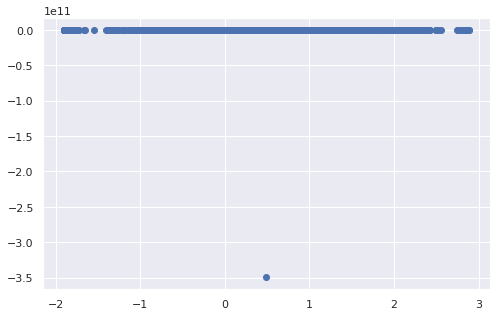

In [ ]:
#Visualizing test values against predicted values
plt.figure(figsize=(8,5))
plt.scatter(y_test_s,pred)

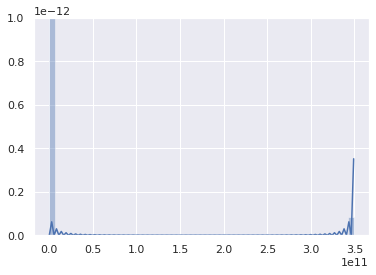

In [ ]:
#Plotting the Residues and looking whether they follow normal distribution or not.
sns.distplot((y_test_s-pred),bins=50)

> *From above Linear Regression model, we don't get a great r2 score and MAE,MSE were too high. Thus,we shall now try out different ML algorithms to build a better model.*

## Building Other ML Models with different algorithms

> *Support Vector Machines (SVM) - In machine learning, support-vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.*

In [ ]:
#SVM using Support Vector Regressor

from sklearn.svm import SVR
m2 = SVR()
m2.fit(X_train_s,y_train_s)
pred = m2.predict(X_test_s)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("Mean absolute error: ", mean_absolute_error(y_test_s,pred))
print("Mean squared error: ", mean_squared_error(y_test_s,pred))
print(" R2 score : ", r2_score(y_test_s,pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean absolute error:  0.19803643212189287
Mean squared error:  0.08003247858692966
 R2 score :  0.9190988446801689


> *We obtain a better model with less value of errors and a great r2 score.*


---
> *We shall now plot the same plots and conclude that we obtain a better model using SVM.*


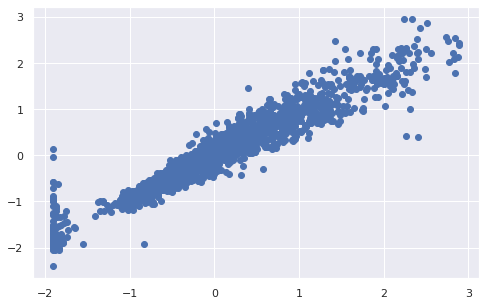

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test_s,pred)

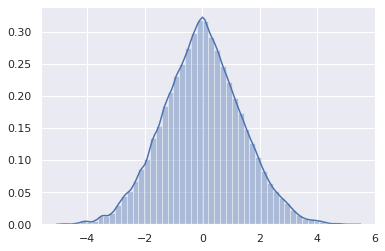

In [ ]:
sns.distplot((y_test_s-pred),bins=50)

> *Decision Tree - It is a Supervised learning technique that can be used for both classification and Regression problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.*

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
m3 = DecisionTreeRegressor()
m3.fit(X_train_s,y_train_s)
pred = m3.predict(X_test_s)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("Mean absolute error: ", mean_absolute_error(y_test_s,pred))
print("Mean squared error: ", mean_squared_error(y_test_s,pred))
print(" R2 score : ", r2_score(y_test_s,pred))

Mean absolute error:  0.22347334479470624
Mean squared error:  0.11876150575121582
 R2 score :  0.8799494506175993


> *We got a better model than linear regression but not as better as the model obtained from SVM.*

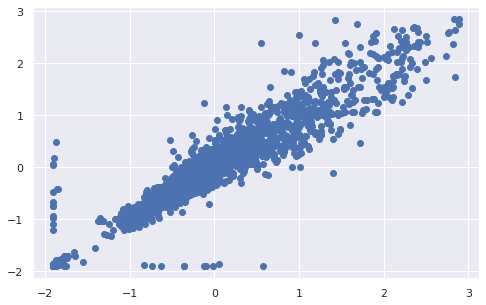

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test_s,pred)

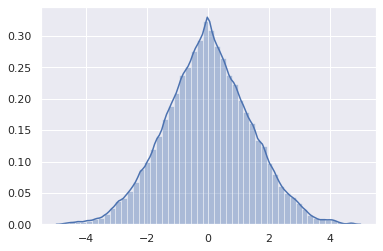

In [ ]:
sns.distplot((y_test_s-pred),bins=50)

> *Random Forests or random decision forests- are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.*

In [ ]:
#Random Forests
from sklearn.ensemble import RandomForestRegressor
m4 = RandomForestRegressor(n_estimators=300,random_state=0)
m4.fit(X_train_s,y_train_s)
pred = m4.predict(X_test_s)

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("Mean absolute error: ", mean_absolute_error(y_test_s,pred))
print("Mean squared error: ", mean_squared_error(y_test_s,pred))
print(" R2 score : ", r2_score(y_test_s,pred))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Mean absolute error:  0.2104985027387051
Mean squared error:  0.0906572059081655
 R2 score :  0.9083587960096466


> *We obtain a better model again and it is now compairable to the model obtained using SVM*

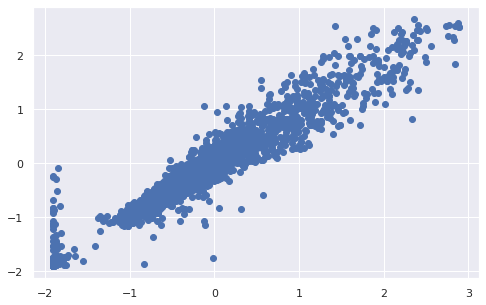

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test_s,pred)

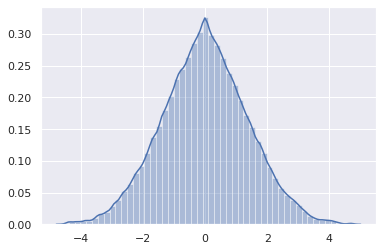

In [ ]:
sns.distplot((y_test_s-pred),bins=50)

## To conclude- 


*   Imported various libraries & data then checked basic stats of the dataset.

*   Performed basic processing like handling outliners, missing values, looking for duplicates, renaming columns etc. to get a cleaned data.

*   Looked for correlation between different columns and gaining understanding.

*   Performed Exploratory Data Analysis by plotting different graphs and understanding deeper aspects of the dataset provided.

*   Performed basic pre-processing steps like scaling of features and splitting of dataset into train and test data.

*   Build different models on the dataset and concluded that model built by Random Forests and SVM perform the best and can be used for predicted the prices of CARS with the features in the provided datset.



